In [12]:
# Import libraries 
import matplotlib.pyplot as plt 
import pandas as pd
import glob
import numpy as np
import multiprocessing as mp

In [2]:
import pandas as pd
import glob
import multiprocessing as mp

def read_mass_freq_file(filepath):
    df = pd.read_csv(filepath, delim_whitespace=True, header=None, names=["mass_solar","radius km", "freq_khz"])
    df["source_file"] = filepath  # Add filename as identifier (optional)
    return df

# Collect all filenames
file_list_hot= glob.glob("/Users/smag0001/Downloads/f_peak_S_2_new/*.out")  # or adjust as needed
file_list = glob.glob("/Users/smag0001/Downloads/f_peak_T_0_new/*.out")
#print(file_list)

# Let's just read in the first EOS 
eos_df = read_mass_freq_file(file_list[0])

In [4]:
print(eos_df)

    mass_solar  radius km  freq_khz  \
0     2.200000  16.716112  3.318129   
1     2.210000  16.702856  3.328729   
2     2.220000  16.689314  3.339416   
3     2.230000  16.675623  3.350153   
4     2.240000  16.661696  3.360966   
5     2.250000  16.647528  3.371856   
6     2.260000  16.633195  3.382804   
7     2.270000  16.618504  3.393864   
8     2.280000  16.603684  3.404973   
9     2.290000  16.588509  3.416197   
10    2.300000  16.572666  3.427625   
11    2.310000  16.556196  3.439251   
12    2.320000  16.539277  3.451023   
13    2.330000  16.522122  3.462883   
14    2.340000  16.504633  3.474861   
15    2.350000  16.486679  3.486996   
16    2.360000  16.468427  3.499240   
17    2.370000  16.449849  3.511605   
18    2.380000  16.430686  3.524169   
19    2.390000  16.411130  3.536876   
20    2.400000  16.390856  3.549828   
21    2.410000  16.369436  3.563156   
22    2.420000  16.348365  3.576413   
23    2.430000  16.325940  3.590117   
24    2.440000  16.302659

Text(0.5, 0, 'radius')

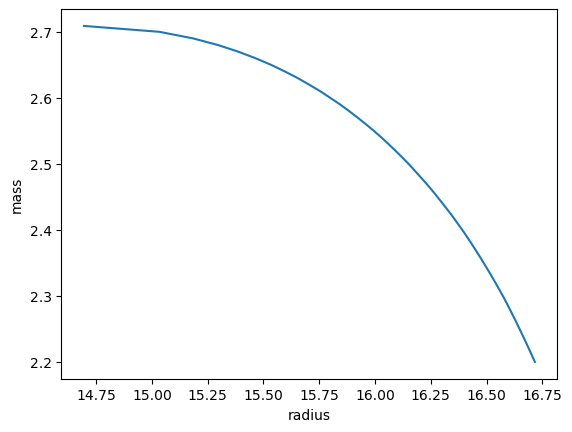

In [9]:
plt.plot(eos_df['radius km'],eos_df['mass_solar'])
plt.ylabel('mass')
plt.xlabel('radius')

In [34]:
# Define the doneva relationships 

# Keplerian rotation limit
def omega_k(mass_nonrot,radius_nonrot):
    rot_freq_khz = 2.0*np.pi*1.716*((mass_nonrot/1.4)**(1./2.))*((radius_nonrot/10.)**(-3/2)) - 0.189*2.0*np.pi
    return rot_freq_khz*1000 # Give result in Hz

# f-mode frequency of a non rotating model
def sigma0(mass_nonrot, radius_nonrot):
    rot_freq_khz = 2.0*np.pi*(1.562 + 1.151*(mass_nonrot/1.4)**(1./2.)*(radius_nonrot/10.)**(-3/2))
    return rot_freq_khz*1000

# f-mode frequency of the rotating model in the inertial frame
def sigmai(freq_nonrot,freq_rot,freq_kep):
    rot_kep = freq_rot/freq_kep
    # Should this be +2 or -2 - Double check and derive! 
    freq_inert = freq_nonrot*(1.- 0.235*(rot_kep) + (2*freq_rot/freq_nonrot) - 0.358*(rot_kep**2))
    return freq_inert
    
# Verify that the calculations match Chakravarti and Andersson
# Results are in Hz
print(omega_k(2.6,10.0))
print(sigma0(2.6,10.0))
freq_nonrot = sigma0(2.6,10.0)
print(sigmai(freq_nonrot,1.35e4,9.5e3))
                            

13505.793612191712
19669.816974389807
25880.99991356498


In [ ]:
# How is Nilaksha calculating the peak frequency?

# Calculate keplerian frequency for a given mass and radius 

# Calculate non rotating frequency